# Dr.CoCo - ML Model Compare - Random OverSampled

## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [2]:
data_df = pd.read_csv('data_random_oversampled.csv').drop(['Unnamed: 0'], axis = 1) # 명시적 인덱스 제거

In [3]:
# cols => blink_score, move_score, silence, baby_cry, baby_laughter, is_sleeping
data_df

,0,1,2,3,4,5
0,0.631505,0.022537,0.148438,0.0,0.0,1.0
1,0.538419,0.037090,0.109375,0.0,0.0,1.0
2,0.495586,0.017830,0.109375,0.0,0.0,1.0
3,0.504354,0.063563,0.109375,0.0,0.0,1.0
4,0.485364,0.018498,0.109375,0.0,0.0,1.0
...,...,...,...,...,...,...
835,0.656996,0.002908,0.800781,0.0,0.0,1.0
836,0.631505,0.022537,0.148438,0.0,0.0,1.0
837,0.651348,0.009156,0.109375,0.0,0.0,1.0
838,0.531894,0.002838,0.109375,0.0,0.0,1.0


In [4]:
# train-test_split
from sklearn.model_selection import train_test_split

X = data_df.iloc[:, :-1] # features
y = data_df.iloc[:, -1] # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SVC 

In [5]:
# Scikit-Learn SVC
# rbf 커널

from sklearn.svm import SVC

svc_model_rbf = SVC(kernel='rbf')

# 학습
svc_model_rbf.fit(X_train, y_train)

# acc 평가
svc_model_rbf_accuracy = svc_model_rbf.score(X_test, y_test)
print("Test Accuracy:", svc_model_rbf_accuracy)

# 모델 저장
joblib.dump(svc_model_rbf,'models/svc_model_rbf.pkl')
print('모델 저장 완료')

Test Accuracy: 0.8095238095238095
모델 저장 완료


In [6]:
# Scikit-Learn SVC
# linear 커널

from sklearn.svm import SVC

svc_model_linear = SVC(kernel='linear')

# 학습
svc_model_linear.fit(X_train, y_train)

# acc 평가
svc_model_linear_accuracy = svc_model_linear.score(X_test, y_test)
print("Test Accuracy:", svc_model_linear_accuracy)

# 모델 저장
joblib.dump(svc_model_linear,'models/svc_model_linear.pkl')
print('모델 저장 완료')

Test Accuracy: 0.8095238095238095
모델 저장 완료


In [7]:
# Scikit-Learn SVC
# Poly 커널

from sklearn.svm import SVC

svc_model_poly = SVC(kernel='poly')

# 학습
svc_model_poly.fit(X_train, y_train)

# acc 평가
svc_model_poly_accuracy = svc_model_poly.score(X_test, y_test)
print("Test Accuracy:", svc_model_poly_accuracy)

# 모델 저장
joblib.dump(svc_model_poly,'models/svc_model_poly.pkl')
print('모델 저장 완료')

Test Accuracy: 0.75
모델 저장 완료


# XGBoost

In [8]:
# XGBoost 

import xgboost as xgb

xgb_model = xgb.XGBClassifier()

# 학습
xgb_model.fit(X_train, y_train)

# acc 평가
xgb_accuracy = xgb_model.score(X_test, y_test)
print("Test Accuracy:", xgb_accuracy)

# 모델 저장
joblib.dump(xgb_model, 'models/xgb_model.pkl')
print('모델 저장 완료')

Test Accuracy: 0.8928571428571429
모델 저장 완료


## LightGBM

In [9]:
# LightGBM

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

# 학습
lgbm_model.fit(X_train, y_train)
# [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
# => 
# 트리 기반 알고리즘 -> 분할이 불순도를 최소화하거나 정보 이득을 최대화하는 기준에 따라
# 학습 과정 중에 양의 이득을 가진 추가적인 분할을 찾지 못함
import IPython; IPython.display.clear_output()

# acc 평가
lgbm_accuracy = lgbm_model.score(X_test, y_test)
print("Test Accuracy:", lgbm_accuracy)

# 모델 저장
joblib.dump(lgbm_model, 'models/lgbm_model.pkl')
print('모델 저장 완료')

Test Accuracy: 0.9047619047619048
모델 저장 완료


## CatBoostClassifier

In [10]:
# CatBoostClassifier

from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()

# 학습
catboost_model.fit(X_train, y_train)
import IPython; IPython.display.clear_output()

# acc 평가
catboost_accuracy = catboost_model.score(X_test, y_test)
print("Test Accuracy:", catboost_accuracy)

# 모델 저장
joblib.dump(catboost_model, 'models/catboost_model.pkl')
print('모델 저장 완료.')

Test Accuracy: 0.8928571428571429
모델 저장 완료.


# Visualization - No Hyperparams Tuning

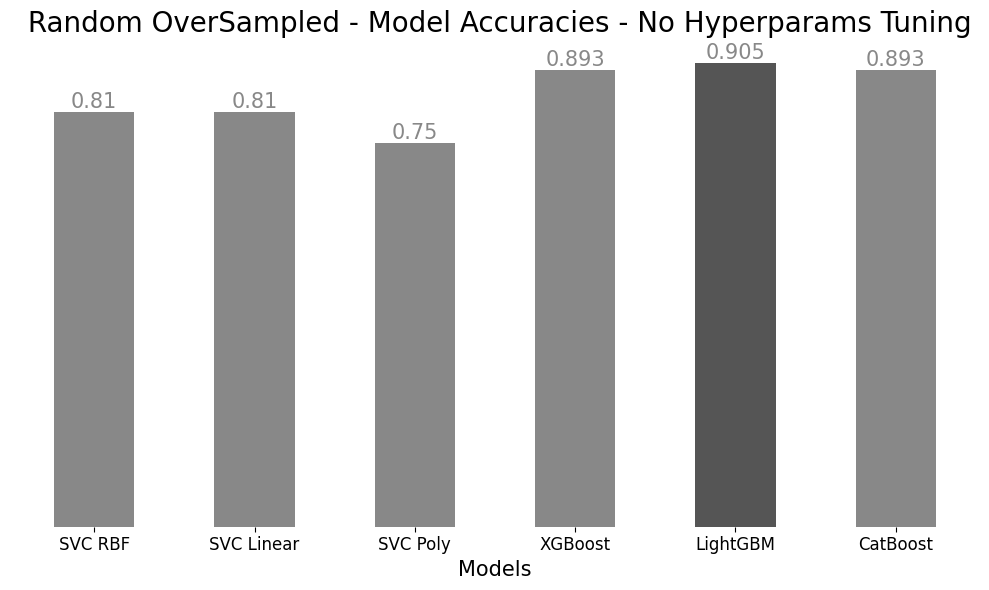

In [11]:
# svc_model_rbf_accurary
# svc_model_linear_accuracy
# svc_model_poly_accuracy
# xgb_accuracy
# lgbm_accuracy
# catboost_accuracy

import matplotlib.pyplot as plt

# 모델별 정확도
accuracies = [svc_model_rbf_accuracy, svc_model_linear_accuracy, svc_model_poly_accuracy, xgb_accuracy, lgbm_accuracy, catboost_accuracy]
models = ['SVC RBF', 'SVC Linear', 'SVC Poly', 'XGBoost', 'LightGBM', 'CatBoost']


plt.figure(figsize=(10,6))

# bar
plt.bar(models, accuracies, color=['#888888', '#888888','#888888','#888888','#555555','#888888'], width=0.5)

# 상자(border) 없애기
plt.box(False)
# 그래프 제목과 축 레이블
plt.title(' Random OverSampled - Model Accuracies - No Hyperparams Tuning', fontsize=20)
plt.xlabel('Models', fontsize=15)
# y축 없이
# plt.ylabel('Accuracy')

# 그래프에 정확도 값 표시
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom', fontsize=15, color='#888888')

# 그래프 출력
plt.xticks(rotation=0, fontsize=12)
# y축 없이
# plt.yticks(fontsize=15)
plt.yticks([])
plt.tight_layout()
plt.savefig('results_graph/random_oversampled_data_model_accuracies_plt.png', dpi=300)
plt.show()

